In [466]:
import pandas as pd
import numpy as np
import os
import csv
import scipy.stats as st
import matplotlib.pyplot as plt


#data file to work with
file = os.path.join('..', 'cleanData', 'CleanFullDataSet.csv')

#read data file
main_data = pd.read_csv(file, low_memory = False)

In [467]:
#data of gender, age, citizenship country/subregion and exploit country/subregion, and type of Labor
labor_df = pd.DataFrame(main_data[['yearOfRegistration', 'gender', 'ageBroad', 'Citizenship Country','typeOfLabourConcatenated','typeOfSexConcatenated','Exploit Sub-Region', 'Exploit Country']])
labor_df.head(5)

,yearOfRegistration,gender,ageBroad,Citizenship Country,typeOfLabourConcatenated,typeOfSexConcatenated,Exploit Sub-Region,Exploit Country
0,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown
1,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown
2,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown
3,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown
4,2002,Female,18--20,Colombia,unknown,unknown,unknown,unknown


In [468]:
labor_pie_df = labor_df['typeOfLabourConcatenated'].value_counts()

#drop unknowns from the labour df
labor_pie_df = labor_pie_df.drop('unknown')

labor_pie_df

Domestic work    2744
Construction     1254
Manufacturing     453
Agriculture       152
Begging           149
Other             139
Aquafarming       107
Hospitality        82
Peddling           72
Name: typeOfLabourConcatenated, dtype: int64

<IPython.core.display.Javascript object>


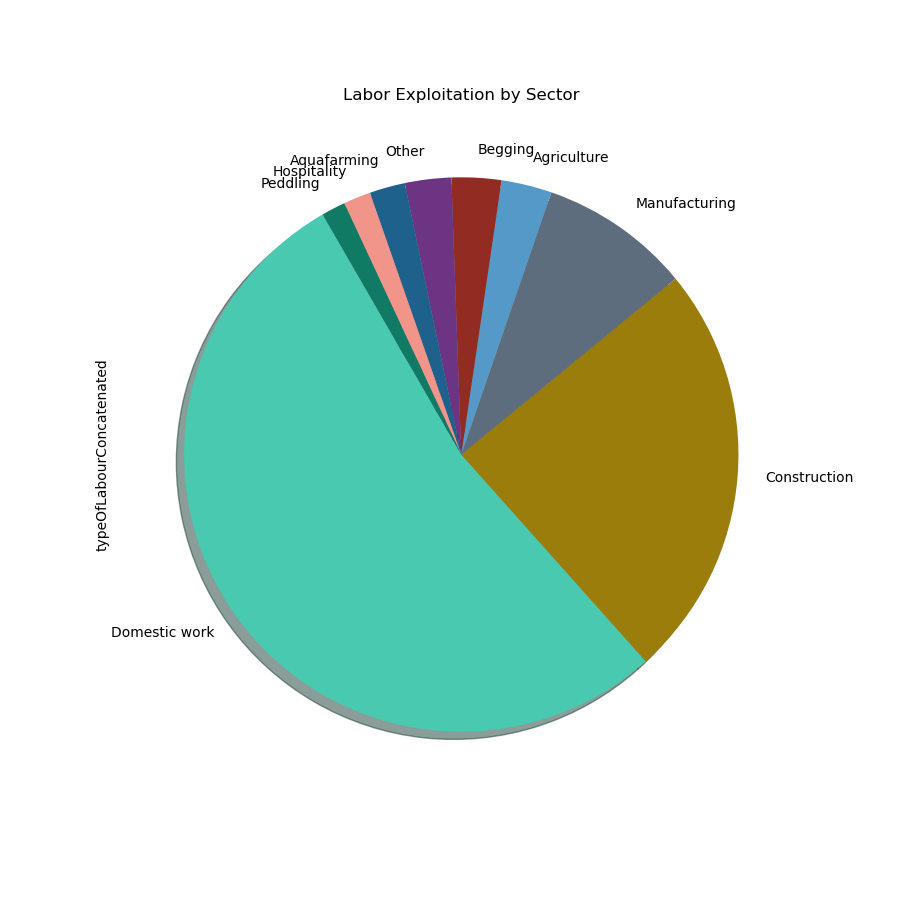

In [469]:
#Plot a pie chart of the Labor demographics by sector
%matplotlib notebook

labor_pie_df.plot(kind="pie",startangle=120, title = "Labor Exploitation by Sector", shadow=True, colors = ['#48C9B0', '#9A7D0A', '#5D6D7E', '#5499C7', '#922B21', '#6C3483', '#1F618D', '#F1948A', '#117A65'], figsize=(9, 9))
#Save pie graph of labor exploitation across all subregions to images subfolder

plt.savefig("Images/labor_exploitation_sectors.png")

In [470]:

country_count = labor_df["Exploit Country"].value_counts()

In [471]:
#Count of labor exploitation per expoit sub region
exp_count = labor_df['Exploit Sub-Region'].value_counts()
exp_count


Eastern Europe                     14020
Northern America                   12512
unknown                            10175
South-eastern Asia                  6139
Western Asia                        1776
Sub-Saharan Africa                  1268
Southern Europe                      615
Central Asia                         495
Latin America and the Caribbean      455
Eastern Asia                         221
Southern Asia                        155
Northern Africa                       24
Western Europe                        24
Northern Europe                       17
Name: Exploit Sub-Region, dtype: int64

In [472]:
#labour by country data frame 
country_df = pd.DataFrame(main_data[['typeOfLabourConcatenated', 'Exploit Sub-Region']])
country_df.head()
known_labor_df = country_df[country_df.typeOfLabourConcatenated != 'unknown']
region_df = pd.DataFrame(main_data[['typeOfLabourConcatenated', 'Exploit Country']])
known_labor_df2 = region_df[region_df.typeOfLabourConcatenated != 'unknown']

In [473]:
#Datatable of Citizenship Country and Labour Sector

In [474]:
region_df = known_labor_df.groupby(["Exploit Sub-Region"])
region_df = region_df['typeOfLabourConcatenated'].value_counts()


<IPython.core.display.Javascript object>


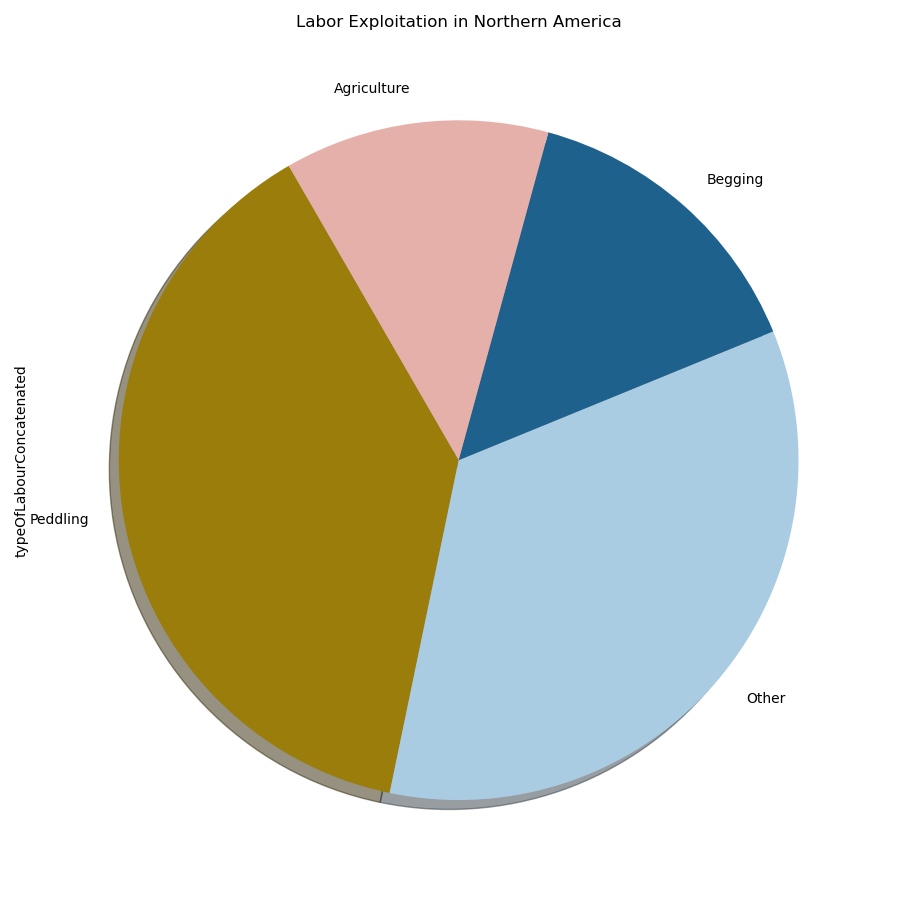

In [475]:
#Labor Exploitation sectors in Northern America
%matplotlib notebook

eastern_europe_labor_df = country_df[country_df["Exploit Sub-Region"] == 'Northern America']
eastern_pie_df = eastern_europe_labor_df['typeOfLabourConcatenated'].value_counts()
eastern_pie_df = eastern_pie_df.drop('unknown')
eastern_pie_df.plot(kind="pie",startangle=120, title = "Labor Exploitation in Northern America", shadow=True, colors = ['#9A7D0A', '#A9CCE3', '#1F618D', '#E6B0AA', '#117A65', '#F1948A', '#117A65', 'aqua'], figsize=(9, 9))
#Save pie graph of labor exploitation in Northern America to images subfolder
plt.savefig("Images/northern_america_pie.png")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


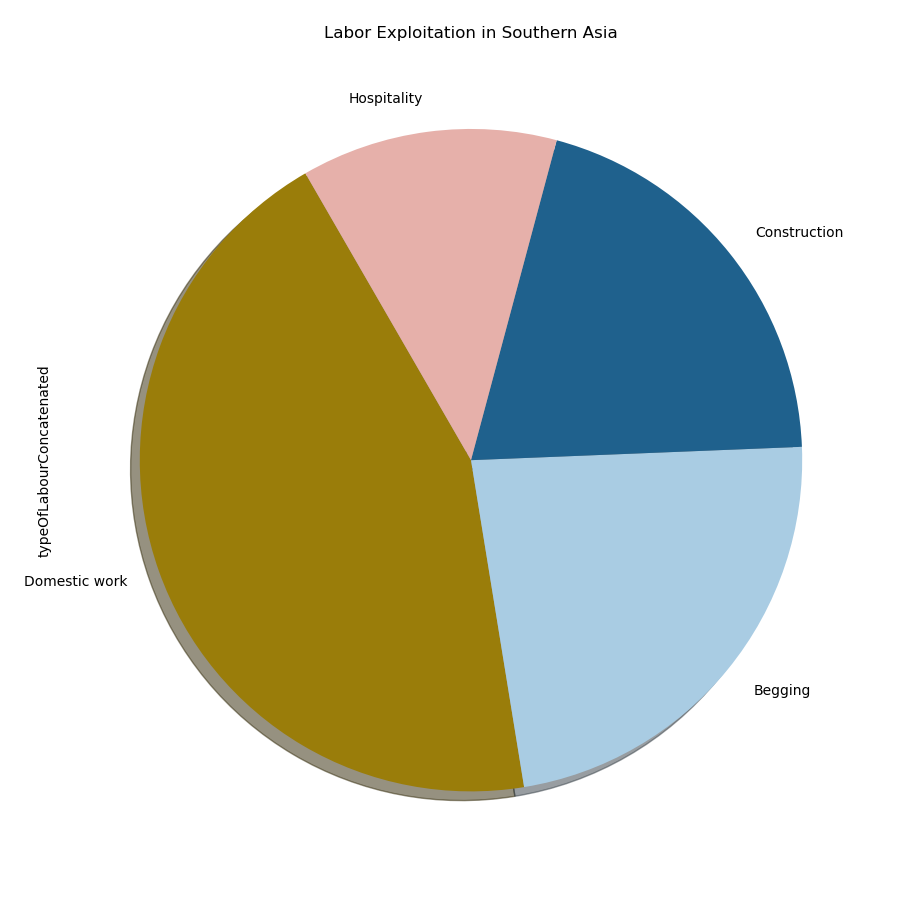

In [476]:
#Labor Exploitation sectors in Southern Asia
%matplotlib notebook

southern_asia_labor_df = country_df[country_df["Exploit Sub-Region"] == 'Southern Asia']
southern_asia_pie_df = southern_asia_labor_df['typeOfLabourConcatenated'].value_counts()
southern_asia_pie_df = southern_asia_pie_df.drop('unknown')
southern_asia_pie_df.plot(kind="pie",startangle=120, title = "Labor Exploitation in Southern Asia", shadow=True, colors = ['#9A7D0A', '#A9CCE3', '#1F618D', '#E6B0AA', '#117A65', '#F1948A', '#117A65', 'aqua'], figsize=(9, 9))
#Save pie graph of labor exploitation in Southern Asia to images subfolder
plt.savefig("Images/southern_asia_pie.png")
plt.tight_layout()
plt.show()


In [477]:
#TO DO: Pick certain high volume countries for in depth analysis?

#List of high volume countries to pick: United States, Ukraine, Moldova, Russia, Philippines, Ghana, Indonesia, Malaysia,
#Ghana, Indonesia, Malaysia, Cambodia, UAE, Thailand
example_countries_df = known_labor_df2.groupby(["Exploit Country"])
example_countries_df = example_countries_df['typeOfLabourConcatenated'].value_counts()

<IPython.core.display.Javascript object>


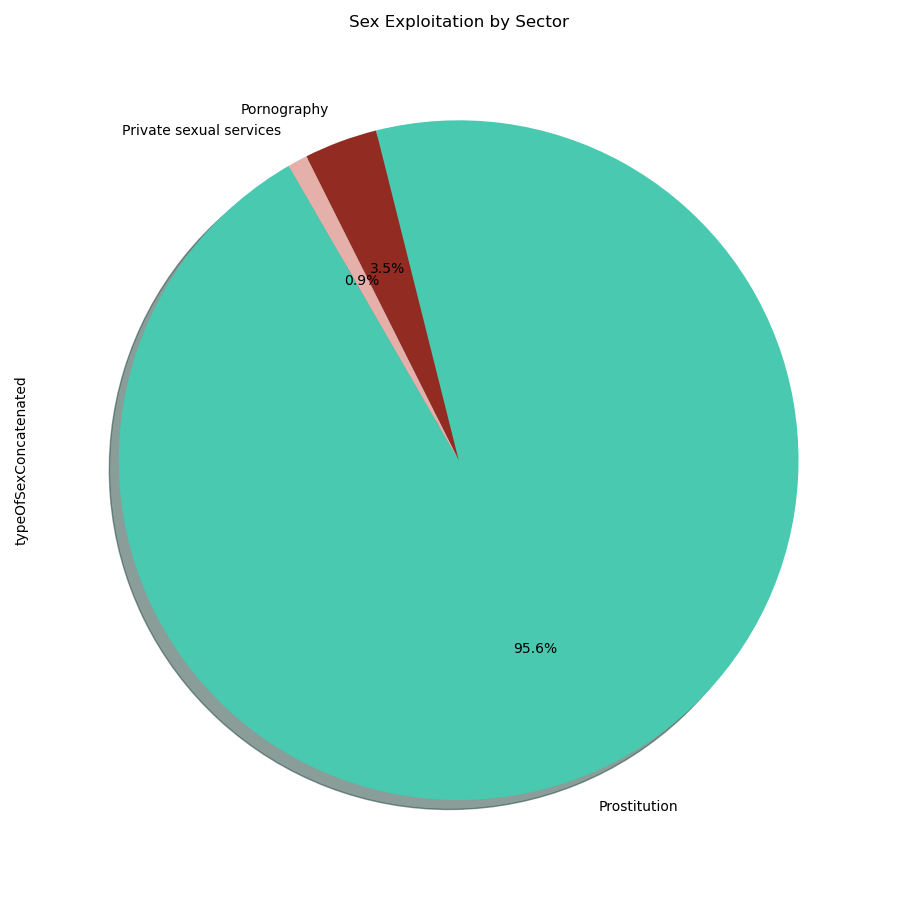

In [478]:
sex_df = pd.DataFrame(main_data[['yearOfRegistration', 'gender', 'ageBroad', 'Citizenship Country','typeOfSexConcatenated','Exploit Sub-Region', 'Exploit Country']])
sex_df.head(5)
sex_chart_df = sex_df['typeOfSexConcatenated'].value_counts()
sex_chart_df = sex_chart_df.drop('unknown')
%matplotlib notebook

#Plot a pie chart of the Labor demographics by sector
sex_chart_df.plot(kind="pie",startangle=120, title = "Sex Exploitation by Sector", autopct='%1.1f%%', shadow=True, colors = ['#48C9B0', '#922B21', '#E6B0AA'], figsize=(9, 9))
plt.tight_layout()
#Save pie graph of sex exploitation to images subfolder
plt.savefig("Images/sex_exploitation_sectors.png")


In [479]:
sex_chart_df.head()

Prostitution               4386
Pornography                 160
Private sexual services      43
Name: typeOfSexConcatenated, dtype: int64

In [480]:
#Exploit sub-regions count of sex exploitation
sex_df.groupby(['Exploit Sub-Region']).count()

,yearOfRegistration,gender,ageBroad,Citizenship Country,typeOfSexConcatenated,Exploit Country
Exploit Sub-Region,,,,,,
Central Asia,495,495,495,495,495,495
Eastern Asia,221,221,221,221,221,221
Eastern Europe,14020,14020,14020,14020,14020,14020
Latin America and the Caribbean,455,455,455,455,455,455
Northern Africa,24,24,24,24,24,24
Northern America,12512,12512,12512,12512,12512,12512
Northern Europe,17,17,17,17,17,17
South-eastern Asia,6139,6139,6139,6139,6139,6139
Southern Asia,155,155,155,155,155,155


In [481]:
sex_year_df= pd.DataFrame(main_data[['yearOfRegistration','typeOfSexConcatenated']])

In [482]:
sex_year_df.head()

,yearOfRegistration,typeOfSexConcatenated
0,2002,unknown
1,2002,unknown
2,2002,unknown
3,2002,unknown
4,2002,unknown


In [483]:
known_sex_df = sex_year_df[sex_year_df.typeOfSexConcatenated == 'Prostitution']
known_sex_df2 = known_sex_df.groupby(["yearOfRegistration"])
known_sex_df2.head()

,yearOfRegistration,typeOfSexConcatenated
18589,2015,Prostitution
18590,2015,Prostitution
18591,2015,Prostitution
18592,2015,Prostitution
18593,2015,Prostitution
33270,2016,Prostitution
33271,2016,Prostitution
33272,2016,Prostitution
33273,2016,Prostitution
33274,2016,Prostitution


In [484]:
known_sex_df2.count()

,typeOfSexConcatenated
yearOfRegistration,
2015,612
2016,1164
2017,1437
2018,1173


In [485]:
full_df = pd.DataFrame(main_data[['Exploit Sub-Region','typeOfLabourAgriculture','typeOfLabourAquafarming','typeOfLabourBegging','typeOfLabourConstruction','typeOfLabourDomesticWork','typeOfLabourHospitality','typeOfLabourManufacturing','typeOfLabourMiningOrDrilling','typeOfLabourPeddling','typeOfLabourTransportation','typeOfLabourOther']])

In [486]:
full_df = full_df[full_df['Exploit Sub-Region'] != 'unknown']
full_df = full_df.groupby(['Exploit Sub-Region'])
labor_bar_df = pd.DataFrame({'Agriculture': full_df['typeOfLabourAgriculture'].sum(), 'Aquafarming': full_df['typeOfLabourAquafarming'].sum(),
                      'Begging' : full_df['typeOfLabourBegging'].sum(), 'Construction': full_df['typeOfLabourConstruction'].sum(),
                      'Domestic Work': full_df['typeOfLabourDomesticWork'].sum(), 'Hospitality': full_df['typeOfLabourHospitality'].sum(), 
                      'Manufacturing': full_df['typeOfLabourManufacturing'].sum(),
                      'Mining' : full_df['typeOfLabourMiningOrDrilling'].sum(),
                      'Peddling': full_df['typeOfLabourPeddling'].sum(), 'Transportation' :full_df['typeOfLabourTransportation'].sum(), 'Other': full_df['typeOfLabourOther'].sum()})

In [487]:
labor_bar_df = labor_bar_df.reindex(["Central Asia", "Eastern Europe", "Northern America", "Sub-Saharan Africa", "Southern Asia", 
                             "Western Asia", "Latin America and the Caribbean", "Northern Africa", "South-eastern Asia", "Eastern Asia"])
#Table of type of labor exploitation by each sub-region
labor_bar_df


,Agriculture,Aquafarming,Begging,Construction,Domestic Work,Hospitality,Manufacturing,Mining,Peddling,Transportation,Other
Exploit Sub-Region,,,,,,,,,,,
Central Asia,0,0,0,126,0,0,0,0,0,0,0
Eastern Europe,133,0,0,1107,11,15,325,0,0,0,5
Northern America,19,0,22,0,0,0,0,0,58,0,52
Sub-Saharan Africa,0,0,103,0,0,0,0,0,0,0,47
Southern Asia,0,0,24,21,46,13,0,0,0,0,0
Western Asia,0,0,0,0,272,13,0,0,14,0,10
Latin America and the Caribbean,0,0,0,0,103,0,0,0,0,0,5
Northern Africa,0,0,0,0,11,0,0,0,0,0,0
South-eastern Asia,0,94,0,0,896,15,89,0,0,0,15


<IPython.core.display.Javascript object>


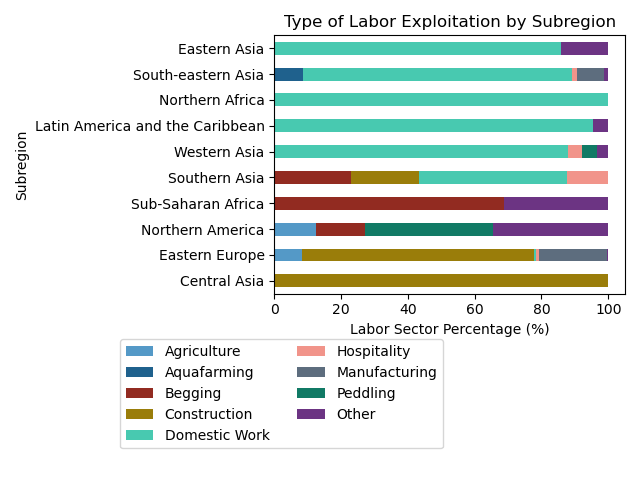

In [488]:
#Create a stacked percentage bar graph of Labor Exploitation per sector per region
#labor_bar_df = labor_bar_df.drop(['Western Europe', 'Northern Europe', 'Southern Europe'])
labor_bar_df = labor_bar_df.drop(columns=['Transportation', 'Mining'])
#scale bar for each subregion to 100% to represent percentage of total exploits
stacked_data = labor_bar_df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked=True, color=['#5499C7', '#1F618D', '#922B21', '#9A7D0A', '#48C9B0', '#F1948A', '#5D6D7E', '#117A65', '#6C3483'])
plt.title("Type of Labor Exploitation by Subregion")
plt.xlabel("Labor Sector Percentage (%)")
plt.ylabel("Subregion")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.tight_layout()
#Save bar graph of labor exploitation by subregion to images subfolder
plt.savefig("Images/labor_exploitation_subregions.png")

In [489]:
timeline_df = pd.DataFrame(main_data[['ageBroad','typeOfLabourAgriculture','typeOfLabourAquafarming','typeOfLabourBegging','typeOfLabourConstruction','typeOfLabourDomesticWork','typeOfLabourHospitality','typeOfLabourManufacturing','typeOfLabourMiningOrDrilling','typeOfLabourPeddling','typeOfLabourTransportation','typeOfLabourOther']])
timeline_df = timeline_df[timeline_df['ageBroad'] != 'unknown']
timeline_df = timeline_df.groupby(['ageBroad'])
timeline2_df = pd.DataFrame({'Agriculture': timeline_df['typeOfLabourAgriculture'].sum(), 'Aquafarming': timeline_df['typeOfLabourAquafarming'].sum(),
                      'Begging' : timeline_df['typeOfLabourBegging'].sum(), 'Construction': timeline_df['typeOfLabourConstruction'].sum(),
                      'Domestic Work': timeline_df['typeOfLabourDomesticWork'].sum(), 'Hospitality': timeline_df['typeOfLabourHospitality'].sum(), 
                      'Manufacturing': timeline_df['typeOfLabourManufacturing'].sum(),
                      'Mining' : timeline_df['typeOfLabourMiningOrDrilling'].sum(),
                      'Peddling': timeline_df['typeOfLabourPeddling'].sum(), 'Transportation' :timeline_df['typeOfLabourTransportation'].sum(), 'Other': timeline_df['typeOfLabourOther'].sum()})

In [490]:
timeline2_df = timeline2_df.reindex(["0--8","9--17","18--20","21--23","24--26","27--29","30--38","39--47","48+"])
timeline2_df

,Agriculture,Aquafarming,Begging,Construction,Domestic Work,Hospitality,Manufacturing,Mining,Peddling,Transportation,Other
ageBroad,,,,,,,,,,,
0--8,0,0,47,0,0,0,0,0,11,0,4
9--17,0,0,102,21,163,13,0,0,61,0,112
18--20,0,0,0,0,51,28,0,0,0,0,14
21--23,19,0,0,36,41,0,16,0,0,0,6
24--26,12,24,0,85,35,0,24,0,0,0,1
27--29,15,0,0,136,39,0,39,0,0,0,1
30--38,69,58,0,580,223,0,130,0,0,0,3
39--47,26,12,0,274,77,0,56,0,0,0,0
48+,11,0,0,122,0,0,76,0,0,0,0


<IPython.core.display.Javascript object>


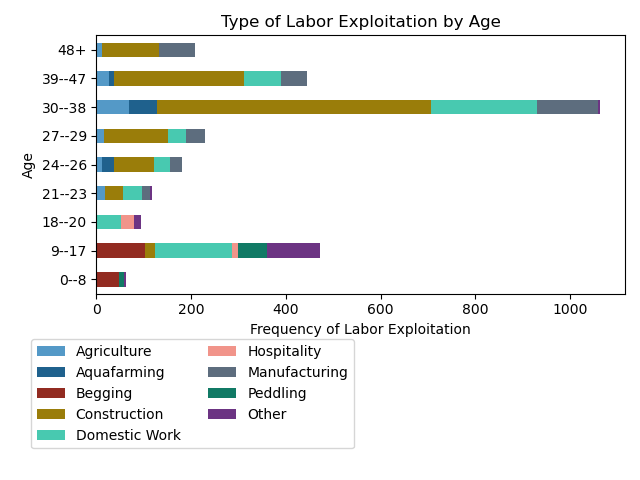

In [491]:
#Create a stacked percentage bar graph of Labor Exploitation per sector by age group
#Drop transportation and mining as the two categories have no data
timeline2_df = timeline2_df.drop(columns=['Transportation', 'Mining'])
timeline2_df.plot(kind="barh", stacked=True, color =['#5499C7', '#1F618D', '#922B21', '#9A7D0A', '#48C9B0', '#F1948A', '#5D6D7E', '#117A65', '#6C3483'])
plt.title("Type of Labor Exploitation by Age")
plt.xlabel("Frequency of Labor Exploitation")
plt.ylabel("Age")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)
plt.tight_layout()
#Save bar graph of labor exploitation by age groups to images subfolder
plt.savefig("Images/labor_exp_by_age.png")

In [492]:
gender_df = pd.DataFrame(main_data[['gender','typeOfLabourAgriculture','typeOfLabourAquafarming','typeOfLabourBegging','typeOfLabourConstruction','typeOfLabourDomesticWork','typeOfLabourHospitality','typeOfLabourManufacturing','typeOfLabourMiningOrDrilling','typeOfLabourPeddling','typeOfLabourTransportation','typeOfLabourOther']])

In [493]:
gender_df = gender_df[gender_df['gender'] != 'unknown']
gender_df = gender_df.groupby(['gender'])
gender_bar_df = pd.DataFrame({'Agriculture': gender_df['typeOfLabourAgriculture'].sum(), 'Aquafarming': gender_df['typeOfLabourAquafarming'].sum(),
                      'Begging' : gender_df['typeOfLabourBegging'].sum(), 'Construction': gender_df['typeOfLabourConstruction'].sum(),
                      'Domestic Work': gender_df['typeOfLabourDomesticWork'].sum(), 'Hospitality': gender_df['typeOfLabourHospitality'].sum(), 
                      'Manufacturing': gender_df['typeOfLabourManufacturing'].sum(),
                      'Mining' : gender_df['typeOfLabourMiningOrDrilling'].sum(),
                      'Peddling': gender_df['typeOfLabourPeddling'].sum(), 'Transportation' :gender_df['typeOfLabourTransportation'].sum(), 'Other': gender_df['typeOfLabourOther'].sum()})

In [494]:
gender_bar_df.reindex(index=gender_bar_df.index[::-1])

gender_bar_df


,Agriculture,Aquafarming,Begging,Construction,Domestic Work,Hospitality,Manufacturing,Mining,Peddling,Transportation,Other
gender,,,,,,,,,,,
Female,133,0,66,11,2410,69,241,0,0,0,73
Male,19,107,83,1243,334,13,212,0,72,0,88


<IPython.core.display.Javascript object>


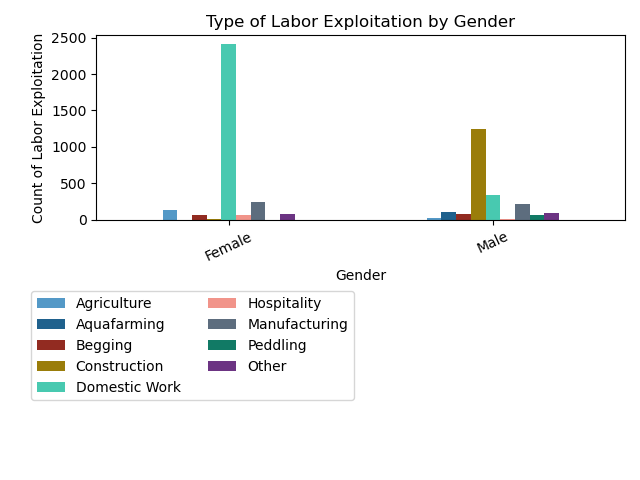

In [495]:
#Create bar graph comparing the count of each sector of labor exploitation per gender

%matplotlib notebook
#Drop transportation and mining as the two categories have no data
gender_bar_df = gender_bar_df.drop(columns=['Transportation', 'Mining'])
gender_bar_df.plot(kind="bar", color=['#5499C7', '#1F618D', '#922B21', '#9A7D0A', '#48C9B0', '#F1948A', '#5D6D7E', '#117A65', '#6C3483'])
plt.title("Type of Labor Exploitation by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Labor Exploitation")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.35), ncol= 2)
plt.xticks(rotation=25)
plt.tight_layout()
#Save bar graph of labor exploitation by genders to images subfolder
plt.savefig("Images/labor_exp_by_gender.png")

In [465]:
#Labor Exploitation Findings:
#Overall, Domestic work represents the majority of categorized exploitation cases, followed by Construction with ~25%, and Manufacturing with ~10%.
#Central Asia and Eastern Europe labor exploitation is dominated by the construction industry. 
#Domestic work dominant in South and East Asia, North Africa, and Latin America.
#Begging exploitation skews younger, age ranges below 18, and in Sub-Saharan Africa. Construction is the dominant industry for older age ranges.
#Females overwhelming majority in Domestic Work, Males overwhelming majority in Construction.
